# Conjugate Bayesian analysis: The beta and Binomial distribution

## Table of Contents:
* [Prior](#first)
* [Likelihood](#second)
* [Posterior](#third)
* [Posterior predictive](#fourth)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
import scipy 

from matplotlib.ticker import FormatStrFormatter

## Prior <a class="anchor" id="first"></a>

Let us define the random variable $π ∈ [0, 1]$ which represents the probability of “success” in the Binomial distribution. We place a prior on the random variable $π$:
\begin{equation}
\mathrm{P}\left(\pi\vert a,b\right)=\frac{\Gamma\left(a+b\right)}{\Gamma\left(a\right)\Gamma\left(b\right)}\left(\pi\right)^{a-1}\left(1-\pi\right)^{b-1}$
\end{equation}

which is a beta distribution with hyper-parameters $\left(a,b\right)$, different examples of the probability density function ($\textbf{PDF}$) can be seen in Figure 1.


Text(0, 0.5, 'PDF')

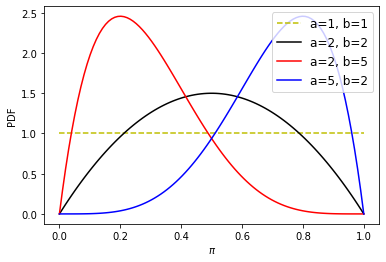

In [10]:
N=100

x=np.linspace(0,1,N)
fig,ax = plt.subplots(1)

ax.plot(x,beta.pdf(x,1,1),c='y',linestyle='dashed', label='a=1, b=1')

ax.plot(x,beta.pdf(x,2,2),c='k', label='a=2, b=2')

ax.plot(x,beta.pdf(x,2,5),c='r', label='a=2, b=5')

ax.plot(x,beta.pdf(x,5,2),c='b', label='a=5, b=2')

legend = ax.legend(loc='upper right', fontsize='large')

plt.xlabel('$\pi$')
plt.ylabel('PDF')

**Figure 1** beta_prior: PDF of random variable $\pi$ with a beta prior with different parameters $\left(a,b\right)$

## Likelihood <a class="anchor" id="second"></a>

Now let us assume that $N$ number of data points have been observed ($\mathcal{D}=\{x_{1},\ldots,x_{N}\}$) where each $x_{n}\in \{0,1,\dots,r\}$ has been sampled from the Binomial distribution, then the probability mass function **PMF** of each $x_{n}$:


\begin{equation}
\mathrm{P}\left(x_{n}\vert r,\pi\right)=\binom{r}{x_{n}}\left(1-\pi\right)^{r-x_{n}}\left(\pi\right)^{x_{n}}
\end{equation}

where $\left(r,\pi\right)$ are distributional parameters. Then the joint likelihood is:

\begin{equation}
\mathrm{P}\left(\mathcal{D}\vert r,\pi\right)=\left[\prod_{n=1}^{N}\binom{r}{x_{n}}\right]\left(1-\pi\right)^{Nr-\sum_{n}x_{n}}\left(\pi\right)^{\sum_{n}x_{n}}
\end{equation}

different examples of the Binomial distribution can be seen in Figure 2

Text(0, 0.5, 'PMF')

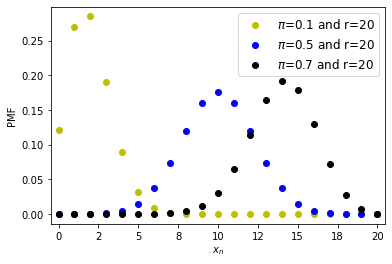

In [15]:
r=20
x=np.array(range(0,r+1))

fig,ax = plt.subplots(1)
ax.scatter(x,binom.pmf(x,r,0.1),c='y', label='$\pi$=0.1 and r=20')

ax.scatter(x,binom.pmf(x,r,0.5),c='b', label='$\pi$=0.5 and r=20')

ax.scatter(x,binom.pmf(x,r,0.7),c='k', label='$\pi$=0.7 and r=20')

plt.xlim(0-0.5,r+0.5)  
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
legend = ax.legend(loc='upper right', fontsize='large')

plt.xlabel('$x_{n}$')
plt.ylabel('PMF')

**Figure 2** PMF of random variable $x_{n}$ with a Binomial distribution with different parameters $\left(r,\pi\right)$.

## Posterior <a class="anchor" id="third"></a>
Then the posterior distribution of $\pi$ is:

\begin{align*}
\mathrm{P}\left(\pi\vert\mathcal{D},r,a,b\right) & \propto p\left(\pi\vert a,b\right)p\left(\mathcal{D}\vert r,\pi\right)\\
 & \propto\left(\pi\right){}^{a-1}\left(1-\pi\right)^{b-1}\left(1-\pi\right)^{Nr-\sum_{n}x_{n}}\left(\pi\right)^{\sum_{n}x_{n}}\\
 & \propto\left(\pi\right){}^{a+\sum_{n}x_{n}-1}\left(1-\pi\right)^{b+Nr-\sum_{n}x_{n}-1}
\end{align*}

which is proportionate to a beta distribution with parameters $\left(a+\sum_{n}x_{n},b+Nr-\sum_{n}x_{n}\right)$,
different examples of this can be seen in Figure 3.

Text(0, 0.5, 'PDF')

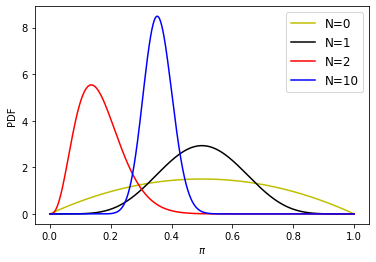

In [20]:
[r,p,a,b]=[10,0.3,2,2]

fig,ax = plt.subplots(1)

x=np.linspace(0,1,1000)
pdf=beta.pdf(x,a,b)
ax.plot(x,pdf,c='y', label='N=0')

X=np.random.binomial(r,p,[1,1])
pdf=beta.pdf(x,a+np.sum(X), b+1*r-np.sum(X))
ax.plot(x,pdf,c='k', label='N=1')

X=np.random.binomial(r,p,[2,1])
pdf=beta.pdf(x,a+np.sum(X), b+2*r-np.sum(X))
ax.plot(x,pdf,c='r', label='N=2')

X=np.random.binomial(r,p,[10,1])
pdf=beta.pdf(x,a+np.sum(X), b+10*r-np.sum(X))
ax.plot(x,pdf,c='b', label='N=10')

legend = ax.legend(loc='upper right', fontsize='large')

plt.xlabel('$\pi$')
plt.ylabel('PDF')

**Figure 3** The posterior distribution of $\pi$ with different number of observations $N$, where
$\pi=0.3$ is the true value of $\pi$

## Posterior predictive <a class="anchor" id="fourth"></a>
One can simply marginalise out the random variable $\pi$, and simply infer the posteiror distribution of a new observation $x^{*}$; we call this the posterior predictive distribution:

\begin{align*}
\mathrm{P}\left(x^{*}\vert\mathcal{D},r,a,b\right) & =\int_{0}^{1}p\left(x^{*}\vert r,\pi\right)p\left(\pi\vert\mathcal{D},a,b\right)d\pi\\
 & \propto\frac{\Gamma\left(r+1\right)}{\Gamma\left(r-x^{*}+1\right)\Gamma\left(x^{*}+1\right)}\frac{\Gamma\left(a+b+Nr\right)}{\Gamma\left(a+\sum_{n}x_{n}\right)\Gamma\left(b+Nr-\sum_{n}x_{n}\right)}\\
 & \times\int_{0}^{1}\left(\pi\right){}^{a+\sum_{n}x_{n}+x^{*}-1}\left(1-\pi\right)^{b+Nr+r-\sum_{n}x_{n}-x^{*}-1}d\pi\\
 & =\frac{\Gamma\left(r+1\right)}{\Gamma\left(r-x^{*}+1\right)\Gamma\left(x^{*}+1\right)}\frac{\Gamma\left(\alpha+b+Nr\right)}{\Gamma\left(a+\sum_{n}x_{n}\right)\Gamma\left(b+Nr-\sum_{n}x_{n}\right)}\\
 & \times\frac{\Gamma\left(a+\sum_{n}x_{n}+x^{*}\right)\Gamma\left(b+Nr+r-\sum_{n}x_{n}-x^{*}\right)}{\Gamma\left(a+b+Nr+r\right)}\\
 & =\binom{r}{x^{*}}\frac{\mathrm{B}\left(a+\sum_{n}x_{n}+x^{*},r-x^{*}+b+Nr-\sum_{n}x_{n}\right)}{\mathrm{B}\left(a+\sum_{n}x_{n},b+Nr-\sum_{n}x_{n}\right)}
\end{align*}

which is a beta-Binomial distribution with parameters:

* $r$: number of trials <br> 
* $\overline{a}=a+\sum_{n=1}^{N}x_{n}$ <br> 
* $\overline{b}=b+Nr-\sum_{n=1}^{N}x_{n}$ <br> 

A comparison of the true Binomial (with $\pi=0.3$) with the posterior
predictive of the beta-Binomial can be seen in Figure \ref{fig:Beta-Bin-Posteiror Predictive}.




Text(0, 0.5, 'PMF')

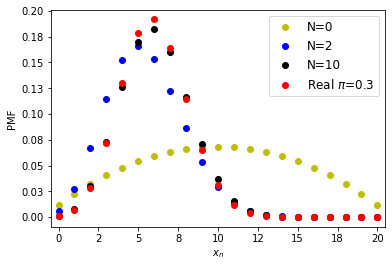

In [25]:
r=20
p=0.3
x=np.array(range(0,r+1)).reshape(r+1,1)


def BetaBin(x,r,a,b):
    out=np.zeros_like(x)*0.0
    for i in range(0,x.shape[0]):
        out[i]=scipy.special.comb(r,x[i])*scipy.special.beta(x[i]+a,r-x[i]+b)/(scipy.special.beta(a,b)	)
    return out




fig,ax = plt.subplots(1)
pmf=BetaBin(x,r,a,b)
ax.scatter(x,pmf,c='y', label='N=0')
	
N=2
X=np.random.binomial(r,p,[N,1])
pmf=BetaBin(x,r,a+np.sum(X),b+N*r-np.sum(X))
ax.scatter(x,pmf,c='b', label='N=2')

N=10
X=np.random.binomial(r,p,[N,1])
pmf=BetaBin(x,r,a+np.sum(X),b+N*r-np.sum(X))
ax.scatter(x,pmf,c='k', label='N=10')

pmf=binom.pmf(x,r,0.3)
ax.scatter(x,pmf,c='r', label='Real $\pi$=0.3')


plt.xlim(0-0.5,r+0.5)  
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

legend = ax.legend(loc='upper right', fontsize='large')
plt.xlabel('$x_{n}$')
plt.ylabel('PMF')


**Figure 4** A comparison of the true Binomial PMF (with $\pi=0.3$) with the posterior
predictive of the beta-Binomial PMF.
